# Data and Sampling Distributions

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from scipy import stats

In [2]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2



In [3]:
%%time

# path on the web
path = 'https://data.cityofnewyork.us/api/views/bsin-59hv/rows.csv?date=20240317&accessType=DOWNLOAD'
df = pd.read_csv(path, low_memory=False)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (861876, 26)
CPU times: user 7.36 s, sys: 2.19 s, total: 9.55 s
Wall time: 1min 1s


,the_geom,bin,bbl,borough,block,lot,address,z_grade,z_floor,subgrade,...,longitude,pluto_bbl,Council,BoroCD,CTLabel,BoroCT2020,NTA2020,NTAName,CDTA2020,CDTAName
0,POINT (-74.22274561187417 40.52134422844183),5128004,5075340353,5.0,7534.0,353,78 SAVO LOOP,29.428,32.332,N,...,-74.222746,5075340353,51,503,226.01,5022601,SI0304,Annadale-Huguenot-Prince's Bay-Woodrow,SI03,SI03 South Shore (CD 3 Approximation)
1,POINT (-74.24179250549321 40.52875316810818),5155392,5075960125,5.0,7596.0,125,72 CHART LOOP,25.366,26.703,N,...,-74.241793,5075960125,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
2,POINT (-74.24109012652094 40.528883822921635),5148808,5075960131,5.0,7596.0,131,40 TIDES LANE,36.172,38.902,N,...,-74.241090,5075960131,51,503,226.02,5022602,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
3,POINT (-74.24649640323727 40.507045708438184),5088274,5079150042,5.0,7915.0,42,328 MAIN STREET,69.897,72.459,N,...,-74.246496,5079150042,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)
4,POINT (-74.24198032271697 40.51005666426356),5087850,5078680123,5.0,7868.0,123,309 SLEIGHT AVENUE,74.907,79.122,N,...,-74.241980,5078680123,51,503,244.01,5024401,SI0305,Tottenville-Charleston,SI03,SI03 South Shore (CD 3 Approximation)


Brief data cleaning the source data.

In [4]:
df.loc[df['z_grade'] == 0, 'z_grade'] = np.nan
df.loc[df['z_floor'] == 0, 'z_floor'] = np.nan

df.loc[:, ['z_grade', 'z_floor']].describe()

,z_grade,z_floor
count,847837.000000,847838.000000
mean,54.807770,59.075916
std,41.961752,42.244047
min,-13.096000,0.703000
25%,24.228000,28.361000
50%,45.095000,49.224000
75%,73.343000,77.704750
max,402.839000,404.397000


In [5]:
# calculate building grade to floor height
df = df.assign(z_floor_grade=df['z_floor'] - df['z_grade'])

df['z_floor_grade'].describe()

count    847837.000000
mean          4.268165
std           3.087395
min         -50.487000
25%           2.015000
50%           3.627000
75%           6.571000
max          94.440000
Name: z_floor_grade, dtype: float64

# Sampling Distribution of a Statistic

In [6]:
sample_data = pd.DataFrame({
    'z_floor_grade': df['z_floor_grade'].dropna().sample(1000),
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'z_floor_grade': [df['z_floor_grade'].sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'z_floor_grade': [df['z_floor_grade'].sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([
    sample_data,
    sample_mean_05,
    sample_mean_20
])

results

,z_floor_grade,type
438021,4.80900,Data
519334,3.06800,Data
617991,0.51100,Data
685546,7.62500,Data
535533,4.33400,Data
...,...,...
995,5.50485,Mean of 20
996,6.22735,Mean of 20
997,5.16770,Mean of 20
998,4.14765,Mean of 20


In [7]:
results.groupby(by='type').describe()

z_floor_grade                                                    \
                   count      mean       std       min       25%       50%   
type                                                                         
Data              1000.0  4.438282  3.182992 -0.279000  2.141750  3.751500   
Mean of 20        1000.0  4.303941  0.698980  2.258556  3.822675  4.286912   
Mean of 5         1000.0  4.307275  1.384310  0.961200  3.354600  4.212300   

                                 
                 75%        max  
type                             
Data        6.911500  24.020000  
Mean of 20  4.754938   7.931579  
Mean of 5   5.134600  10.816200

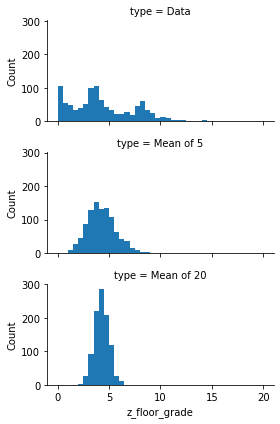

In [8]:
g = sns.FacetGrid(
    results,
    col='type',
    col_wrap=1,
    height=2,
    aspect=2
)

g.map(
    plt.hist, 'z_floor_grade',
    range=[0, 20],
    bins=40
)

g.set_axis_labels('z_floor_grade', 'Count')
plt.tight_layout()

# The Bootstrap

In [9]:
results = []
for nrepeat in range(1000):
    sample = resample(df['z_floor_grade'])
    results.append(sample.median())
    
results = pd.Series(results)

print('Bootstrapping Statistics\n-----')
print('original: {}'.format(df['z_floor_grade'].median()))
print('bias : {}'.format(results.mean() - df['z_floor_grade'].median()))
print('std: {}'.format(results.std()))

Bootstrapping Statistics
-----
original: 3.6269999999999953
bias : -0.0003334999999951016
std: 0.0026669533911164995


# Confidence Intervals

mean z_floor_grade: 4.26816539146086
sample mean: 4.533777777777778


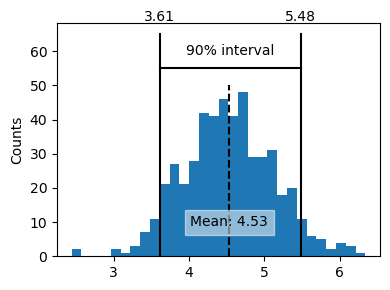

In [10]:
print('mean z_floor_grade:', df['z_floor_grade'].mean())
np.random.seed(0)

# create a sample of 20 loan income data
sample20 = resample(
    df['z_floor_grade'],
    n_samples=20,
    replace=False,
    random_state=0
)
print('sample mean:', sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(
    results.quantile([0.05, 0.95])
)

ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(
        x, 70, f'{x:.2f}', 
        horizontalalignment='center', verticalalignment='center'
    )
    
ax.text(
    sum(confidence_interval) / 2, 60, '90% interval',
    horizontalalignment='center', verticalalignment='center'
)

mean_height = results.mean()

ax.plot(
    [mean_height, mean_height], [0, 50],
    color='black', linestyle='--'
)
ax.text(
    mean_height, 10, f'Mean: {mean_height:.2f}',
    bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
    horizontalalignment='center', verticalalignment='center'
)
ax.set_ylabel('Counts')

plt.tight_layout()

mean z_floor_grade: 4.26816539146086
sample mean: 4.533777777777778


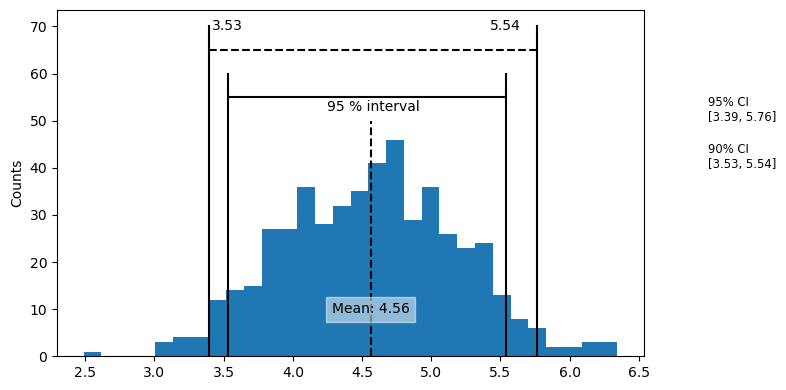

In [11]:
print('mean z_floor_grade:', df['z_floor_grade'].mean())
np.random.seed(0)

sample20 = resample(
    df['z_floor_grade'],
    n_samples=20,
    replace=False,
)
print('sample mean:', sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(
    results.quantile([0.05, 0.95])
)
ax = results.plot.hist(bins=30, figsize=(8, 4), color='tab:blue')
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
    ax.text(
        x, 70, f'{x:.2f}', 
        horizontalalignment='center', verticalalignment='center'
    )
ax.text(
    7, 40, 
    f'90% CI\n[{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]',
    fontsize='small')

confidence_interval = list(
    results.quantile([0.025, 0.975])
)
ax = results.plot.hist(bins=30, figsize=(8, 4), color='tab:blue')
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')

for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(
    7, 50,
    f'95% CI\n[{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]',
    fontsize='small')
ax.text(
    sum(confidence_interval) / 2, 53, '95 % interval',
    horizontalalignment='center', verticalalignment='center')

mean_height = results.mean()

ax.plot(
    [mean_height, mean_height], [0, 50],
    color='black', linestyle='--'
)
ax.text(
    mean_height, 10, f'Mean: {mean_height:.2f}',
    bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
    horizontalalignment='center', verticalalignment='center'
)
ax.set_ylabel('Counts')

plt.tight_layout()

# Normal Distribution
## Standard Normal and QQ-Plots

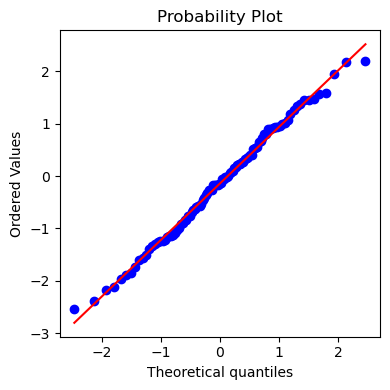

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()

# Long-Tailed Distributions

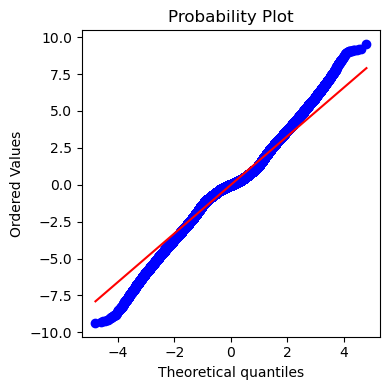

In [13]:
fig, ax = plt.subplots(figsize=(4, 4))

dist = np.diff(
    np.log(df.loc[df['z_floor_grade'] > 0, 'z_floor_grade'])
)

stats.probplot(dist, plot=ax)

plt.tight_layout()

# Binomial Distribution

In [14]:
print('Probability mass function evaluated at k:', stats.binom.pmf(2, n=5, p=0.1))
print('Cumulative distribution function evaluated at k:', stats.binom.cdf(2, n=5, p=0.1))

Probability mass function evaluated at k: 0.07289999999999992
Cumulative distribution function evaluated at k: 0.99144


# Poisson and Related Distribution
## Poisson Distributions

<AxesSubplot:ylabel='Frequency'>

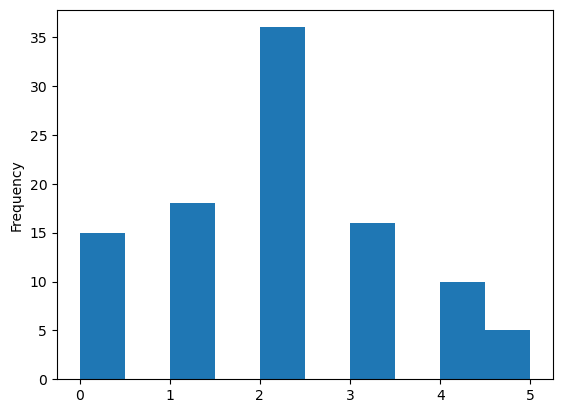

In [15]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()

<AxesSubplot:ylabel='Frequency'>

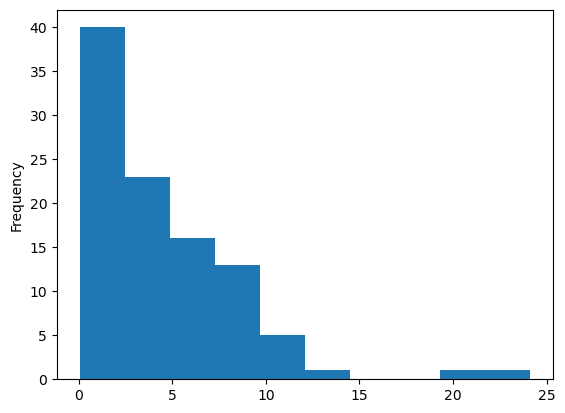

In [16]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()

<AxesSubplot:ylabel='Frequency'>

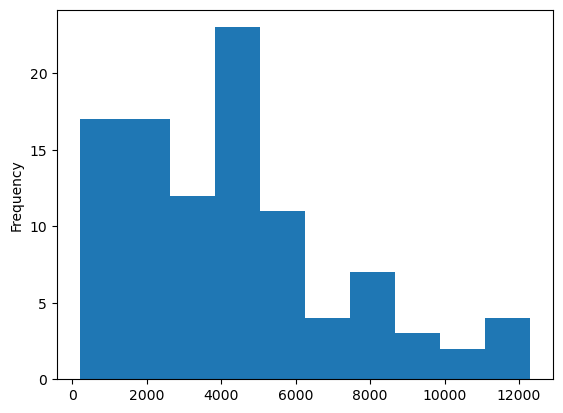

In [17]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()